<a href="https://colab.research.google.com/github/shenles/CS06_DataViz/blob/master/LeslieShen_LendingClub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
read_in_data = pd.read_csv('/content/drive/My Drive/loan.csv')
all_lc_data = read_in_data.copy(deep=True)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
drive.flush_and_unmount()

In [0]:
# show how many rows and columns
all_lc_data.shape

(2260668, 145)

In [0]:
all_lc_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=145)

In [0]:
# find percentage of null values in each column
empty_columns = []

for col in all_lc_data.columns:
  null_count = all_lc_data[col].isna().sum()
  null_percentage = (null_count / len(all_lc_data[col])) * 100
  # keep track of >90% empty columns in a list
  if null_percentage >= 90.0:
    empty_columns.append(col)
  print(col, null_percentage)

id 100.0
member_id 100.0
loan_amnt 0.0
funded_amnt 0.0
funded_amnt_inv 0.0
term 0.0
int_rate 0.0
installment 0.0
grade 0.0
sub_grade 0.0
emp_title 7.385825782467837
emp_length 6.498388971755251
home_ownership 0.0
annual_inc 0.00017693885170224022
verification_status 0.0
issue_d 0.0
loan_status 0.0
pymnt_plan 0.0
url 100.0
desc 94.42346244561341
purpose 0.0
title 1.0317746789886884
zip_code 4.4234712925560055e-05
addr_state 0.0
dti 0.07568559381563325
delinq_2yrs 0.0012828066748412415
earliest_cr_line 0.0012828066748412415
inq_last_6mths 0.0013270413877668017
mths_since_last_delinq 51.246003393687175
mths_since_last_record 84.11283744450755
open_acc 0.0012828066748412415
pub_rec 0.0012828066748412415
revol_bal 0.0
revol_util 0.07971095269185922
total_acc 0.0012828066748412415
initial_list_status 0.0
out_prncp 0.0
out_prncp_inv 0.0
total_pymnt 0.0
total_pymnt_inv 0.0
total_rec_prncp 0.0
total_rec_int 0.0
total_rec_late_fee 0.0
recoveries 0.0
collection_recovery_fee 0.0
last_pymnt_d 0.107

In [0]:
# we can drop or simply ignore these columns
print(len(empty_columns))
print(empty_columns)

38
['id', 'member_id', 'url', 'desc', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term', 'hardship_amount', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_length', 'hardship_dpd', 'hardship_loan_status', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'settlement_term']


In [0]:
cols_to_drop = empty_columns[2:]
all_lc_data.drop(cols_to_drop, axis=1, inplace=True)
all_lc_data.shape

(2260668, 109)

In [0]:
all_lc_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,...,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,...,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,N,Cash,N
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,...,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,N,Cash,N
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,490xx,MI,10.51,0.0,Apr-2011,0.0,NaN,NaN,8.0,0.0,4599,19.1,13.0,w,4787.21,4787.21,353.89,353.89,212.79,141.10,...,4.0,18383.0,13800.0,0.0,0.0,0.0,87.0,92.0,15.0,14.0,2.0,77.0,NaN,14.0,NaN,0.0,0.0,3.0,3.0,3.0,4.0,6.0,7.0,3.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,136927.0,11749.0,13800.0,10000.0,N,Cash,N
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,IT Supervisor,10+ years,MORTGAGE,92000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,985xx,WA,16.74,0.0,Feb-2006,0.0,NaN,NaN,10.0,0.0,5468,78.1,13.0,w,3831.93,3831.93,286.71,286.71,168.07,118.64,...,5.0,30505.0,1239.0,75.2,0.0,0.0,62.0,154.0,64.0,5.0,3.0,64.0,NaN,5.0,NaN,0.0,1.0,2.0,1.0,2.0,7.0,2.0,3.0,2.0,10.0,0.0,0.0,0.0,3.0,100.0,100.0,0.0,0.0,385183.0,36151.0,5000.0,44984.0,N,Cash,N
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,Mechanic,10+ years,MORTGAGE,57250.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,212xx,MD,26.35,0.0,Dec-2000,0.0,NaN,NaN,12.0,0.0,829,3.6,26.0,w,29339.02,29339.02,1423.21,1423.21,660.98,762.23,...,9.0,9667.0,8471.0,8.9,0.0,0.0,53.0,216.0,2.0,2.0,2.0,2.0,NaN,13.0,NaN,0.0,2.0,2.0,3.0,8.0,9.0,6.0,15.0,2.0,12.0,0.0,0.0,0.0,5.0,92.3,0.0,0.0,0.0,157548.0,29674.0,9300.0,32332.0,N,Cash,N


In [0]:
all_lc_data['issue_year'] = pd.DatetimeIndex(all_lc_data['issue_d']).year
all_lc_data['issue_year'][0]

2018

In [0]:
# isolate the interest rates for all years
rates_07 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2007]
rates_07.head()

2139018    11.22
2139020    10.59
2139022     7.75
2139023     7.43
2139024     8.07
Name: int_rate, dtype: float64

In [0]:
rates_08 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2008]
rates_09 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2009]
rates_10 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2010]
rates_11 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2011]
rates_12 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2012]
rates_13 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2013]
rates_14 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2014]
rates_15 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2015]
rates_16 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2016]
rates_17 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2017]
rates_18 = all_lc_data['int_rate'][all_lc_data['issue_year'] == 2018]

In [0]:
# find and store median, mean, min, and max interest rates for all years
rate_medians = [rates_07.median(), rates_08.median(), rates_09.median(), rates_10.median(), rates_11.median(), rates_12.median(), rates_13.median(), rates_14.median(), rates_15.median(), rates_16.median(), rates_17.median(), rates_18.median()]
print(rate_medians)
print(len(rate_medians))

[11.54, 11.91, 12.53, 11.86, 11.99, 13.67, 14.33, 13.65, 12.29, 11.99, 12.62, 11.8]
12


In [0]:
rate_means = [rates_07.mean(), rates_08.mean(), rates_09.mean(), rates_10.mean(), rates_11.mean(), rates_12.mean(), rates_13.mean(), rates_14.mean(), rates_15.mean(), rates_16.mean(), rates_17.mean(), rates_18.mean()]
print(rate_means)

[11.825107794361525, 12.061964061847076, 12.437246733573073, 11.98526760788084, 12.223365406748053, 13.637787209326653, 14.531892310895982, 13.769465303521988, 12.59933045990352, 13.0416989598021, 13.244324798976617, 12.729271729782955]


In [0]:
rate_mins = [rates_07.min(), rates_08.min(), rates_09.min(), rates_10.min(), rates_11.min(), rates_12.min(), rates_13.min(), rates_14.min(), rates_15.min(), rates_16.min(), rates_17.min(), rates_18.min()]
print(rate_mins)

[7.12, 6.0, 6.0, 5.42, 5.42, 6.0, 6.0, 6.0, 5.32, 5.32, 5.32, 5.31]


In [0]:
rate_maxes = [rates_07.max(), rates_08.max(), rates_09.max(), rates_10.max(), rates_11.max(), rates_12.max(), rates_13.max(), rates_14.max(), rates_15.max(), rates_16.max(), rates_17.max(), rates_18.max()]
print(rate_maxes)

[17.86, 19.47, 21.21, 21.64, 24.59, 24.89, 26.06, 26.06, 28.99, 30.99, 30.99, 30.99]


In [0]:
loan_issue_years = []
value_types = []
interest_rates_all_types = []

for y in range(2007, 2019):
  loan_issue_years.append(y)

loan_issue_years *= 4
value_types = ['median'] * 12
value_types.extend(['mean'] * 12)
value_types.extend(['min'] * 12)
value_types.extend(['max'] * 12)
interest_rates_all_types.extend(rate_medians)
interest_rates_all_types.extend(rate_means)
interest_rates_all_types.extend(rate_mins)
interest_rates_all_types.extend(rate_maxes)

print(len(loan_issue_years), len(value_types), len(interest_rates_all_types))

48 48 48


In [0]:
# set up dataframe for easy plotting
new_framedict = {'Issue_Year': loan_issue_years, 'value_type': value_types, 'Interest_Rate': interest_rates_all_types}
frame_to_plot = pd.DataFrame(new_framedict, columns=['Issue_Year', 'value_type', 'Interest_Rate'])
frame_to_plot

,Issue_Year,value_type,Interest_Rate
0,2007,median,11.540000
1,2008,median,11.910000
2,2009,median,12.530000
3,2010,median,11.860000
4,2011,median,11.990000
5,2012,median,13.670000
6,2013,median,14.330000
7,2014,median,13.650000
8,2015,median,12.290000
9,2016,median,11.990000


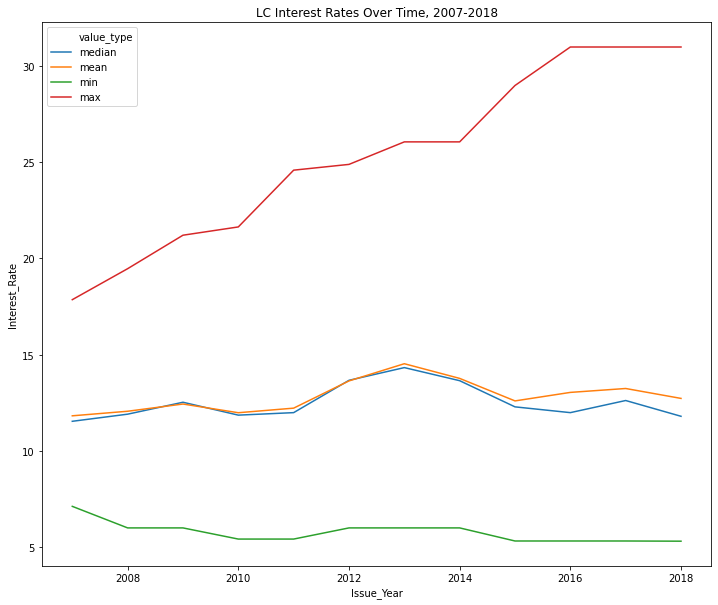

In [0]:
plt.figure(figsize=(12, 10))
sns.lineplot(x='Issue_Year', y='Interest_Rate', hue='value_type', data=frame_to_plot)
plt.title('LC Interest Rates Over Time, 2007-2018')
plt.show()

In [0]:
all_lc_data['loan_status'].value_counts()

Fully Paid                                             1041952
Current                                                 919695
Charged Off                                             261655
Late (31-120 days)                                       21897
In Grace Period                                           8952
Late (16-30 days)                                         3737
Does not meet the credit policy. Status:Fully Paid        1988
Does not meet the credit policy. Status:Charged Off        761
Default                                                     31
Name: loan_status, dtype: int64

In [0]:
# total number of loans per state
all_lc_data['addr_state'].value_counts()

CA    314533
NY    186389
TX    186335
FL    161991
IL     91173
NJ     83132
PA     76939
OH     75132
GA     74196
VA     62954
NC     62730
MI     58770
MD     54008
AZ     53777
MA     51784
CO     48183
WA     47060
MN     39517
IN     37515
MO     36084
CT     35785
TN     35483
NV     32657
WI     29877
SC     28003
AL     27284
OR     26789
LA     25759
KY     21887
OK     20691
KS     19109
AR     17074
UT     14993
MS     12639
NM     11986
NH     11142
HI     10668
RI     10005
WV      8351
NE      7819
DE      6458
MT      6299
DC      5356
AK      5231
ME      4974
VT      4937
WY      4748
SD      4549
ID      4308
ND      3591
IA        14
Name: addr_state, dtype: int64

In [0]:
def build_dict(val_counts):
  all_keys = val_counts.keys().tolist()
  all_values = val_counts.tolist()
  dict_to_fill = {}

  for i in range(len(all_keys)):
    curr_key = all_keys[i]
    if not curr_key in dict_to_fill:
      dict_to_fill[curr_key] = all_values[i]

  return dict_to_fill

# build dictionary of states and total number of loans in each state
loans_by_state = build_dict(all_lc_data['addr_state'].value_counts())

print(loans_by_state)

{'CA': 314533, 'NY': 186389, 'TX': 186335, 'FL': 161991, 'IL': 91173, 'NJ': 83132, 'PA': 76939, 'OH': 75132, 'GA': 74196, 'VA': 62954, 'NC': 62730, 'MI': 58770, 'MD': 54008, 'AZ': 53777, 'MA': 51784, 'CO': 48183, 'WA': 47060, 'MN': 39517, 'IN': 37515, 'MO': 36084, 'CT': 35785, 'TN': 35483, 'NV': 32657, 'WI': 29877, 'SC': 28003, 'AL': 27284, 'OR': 26789, 'LA': 25759, 'KY': 21887, 'OK': 20691, 'KS': 19109, 'AR': 17074, 'UT': 14993, 'MS': 12639, 'NM': 11986, 'NH': 11142, 'HI': 10668, 'RI': 10005, 'WV': 8351, 'NE': 7819, 'DE': 6458, 'MT': 6299, 'DC': 5356, 'AK': 5231, 'ME': 4974, 'VT': 4937, 'WY': 4748, 'SD': 4549, 'ID': 4308, 'ND': 3591, 'IA': 14}


In [0]:
# select loans not likely to be repaid
all_chargedoff = all_lc_data[all_lc_data['loan_status'] == 'Charged Off']
all_defaulted = all_lc_data[all_lc_data['loan_status'] == 'Default']
more_chargedoff = all_lc_data[all_lc_data['loan_status'] == 'Does not meet the credit policy. Status:Charged Off']

# build dictionary of states and number of bad loans in each state
chargedoff_bystate = all_chargedoff['addr_state'].value_counts()
defaulted_bystate = all_defaulted['addr_state'].value_counts()
more_chargedoff_bystate = more_chargedoff['addr_state'].value_counts()
# start with charged off loans
bad_loans_by_state = build_dict(chargedoff_bystate)
print(bad_loans_by_state)

defaults_by_state = build_dict(defaulted_bystate)
addtl_chargedoff = build_dict(more_chargedoff_bystate)
print(defaults_by_state)
print(addtl_chargedoff)

{'CA': 37653, 'NY': 23559, 'TX': 21241, 'FL': 19970, 'NJ': 9973, 'PA': 9212, 'IL': 9120, 'OH': 8830, 'GA': 7743, 'NC': 7668, 'VA': 7379, 'MI': 6950, 'MD': 6450, 'AZ': 6241, 'MA': 5735, 'MN': 4634, 'IN': 4541, 'WA': 4506, 'CO': 4500, 'MO': 4404, 'NV': 4334, 'TN': 4247, 'AL': 3828, 'LA': 3516, 'CT': 3334, 'WI': 3139, 'OK': 2809, 'KY': 2623, 'SC': 2550, 'AR': 2346, 'OR': 2299, 'KS': 1826, 'UT': 1681, 'MS': 1655, 'NM': 1542, 'HI': 1333, 'RI': 1025, 'NH': 911, 'NE': 870, 'WV': 752, 'DE': 741, 'MT': 628, 'AK': 617, 'SD': 572, 'WY': 481, 'DC': 442, 'VT': 361, 'ND': 315, 'ID': 301, 'ME': 267, 'IA': 1}
{'CA': 4, 'TX': 4, 'NY': 3, 'IL': 3, 'MD': 2, 'IN': 2, 'OH': 2, 'CO': 1, 'FL': 1, 'WA': 1, 'NJ': 1, 'MN': 1, 'ME': 1, 'KY': 1, 'GA': 1, 'WI': 1, 'AL': 1, 'TN': 1}
{'CA': 101, 'FL': 72, 'NY': 57, 'TX': 55, 'PA': 43, 'IL': 36, 'GA': 35, 'NJ': 26, 'MO': 26, 'MA': 24, 'MD': 23, 'MI': 19, 'OH': 18, 'AZ': 18, 'NV': 16, 'VA': 16, 'WA': 16, 'WI': 14, 'CO': 13, 'CT': 12, 'NC': 12, 'MN': 11, 'KY': 10, 'AL'

In [0]:
def add_to_dict(first_dict, dict_to_add):
  for st in dict_to_add.keys():
    if st in first_dict:
      first_dict[st] += dict_to_add[st]

add_to_dict(bad_loans_by_state, defaults_by_state)
print(bad_loans_by_state)
add_to_dict(bad_loans_by_state, addtl_chargedoff)
print(bad_loans_by_state)

{'CA': 37661, 'NY': 23565, 'TX': 21249, 'FL': 19972, 'NJ': 9975, 'PA': 9212, 'IL': 9126, 'OH': 8834, 'GA': 7745, 'NC': 7668, 'VA': 7379, 'MI': 6950, 'MD': 6454, 'AZ': 6241, 'MA': 5735, 'MN': 4636, 'IN': 4545, 'WA': 4508, 'CO': 4502, 'MO': 4404, 'NV': 4334, 'TN': 4249, 'AL': 3830, 'LA': 3516, 'CT': 3334, 'WI': 3141, 'OK': 2809, 'KY': 2625, 'SC': 2550, 'AR': 2346, 'OR': 2299, 'KS': 1826, 'UT': 1681, 'MS': 1655, 'NM': 1542, 'HI': 1333, 'RI': 1025, 'NH': 911, 'NE': 870, 'WV': 752, 'DE': 741, 'MT': 628, 'AK': 617, 'SD': 572, 'WY': 481, 'DC': 442, 'VT': 361, 'ND': 315, 'ID': 301, 'ME': 269, 'IA': 1}
{'CA': 37762, 'NY': 23622, 'TX': 21304, 'FL': 20044, 'NJ': 10001, 'PA': 9255, 'IL': 9162, 'OH': 8852, 'GA': 7780, 'NC': 7680, 'VA': 7395, 'MI': 6969, 'MD': 6477, 'AZ': 6259, 'MA': 5759, 'MN': 4647, 'IN': 4552, 'WA': 4524, 'CO': 4515, 'MO': 4430, 'NV': 4350, 'TN': 4253, 'AL': 3838, 'LA': 3521, 'CT': 3346, 'WI': 3155, 'OK': 2812, 'KY': 2635, 'SC': 2554, 'AR': 2352, 'OR': 2305, 'KS': 1831, 'UT': 168

In [0]:
# now that we have the number of bad loans and total number of loans for each state,
# we divide to get the percentage
percent_bad_by_state = dict(bad_loans_by_state)
for k in loans_by_state.keys():
  if k in percent_bad_by_state:
    percent_bad_by_state[k] = percent_bad_by_state[k] / loans_by_state[k]

print(percent_bad_by_state)

{'CA': 0.12005735487214378, 'NY': 0.1267349468048007, 'TX': 0.11433171438538117, 'FL': 0.12373526924335303, 'NJ': 0.12030265120531203, 'PA': 0.12029009994931049, 'IL': 0.1004902767266625, 'OH': 0.11781930469041155, 'GA': 0.10485740471184431, 'NC': 0.12242945958871354, 'VA': 0.1174667217333291, 'MI': 0.11858090862685043, 'MD': 0.11992667752925493, 'AZ': 0.1163880469345631, 'MA': 0.11121195736134713, 'MN': 0.11759495913151302, 'IN': 0.12133813141410103, 'WA': 0.09613259668508287, 'CO': 0.09370524873918187, 'MO': 0.12276909433543953, 'NV': 0.13320268242643232, 'TN': 0.1198602147507257, 'AL': 0.14066852367688024, 'LA': 0.13669008890096665, 'CT': 0.09350286432862931, 'WI': 0.10559962512969844, 'OK': 0.13590449954086317, 'KY': 0.12039109973957143, 'SC': 0.09120451380209263, 'AR': 0.13775330912498535, 'OR': 0.08604277875247303, 'KS': 0.09581872416138992, 'UT': 0.11245247782298406, 'MS': 0.13126038452409208, 'NM': 0.12890038378107793, 'HI': 0.125140607424072, 'RI': 0.10264867566216891, 'NH': 0

In [0]:
states_final = list(percent_bad_by_state.keys())
values_final = list(percent_bad_by_state.values())

new_plotdict = {'State': states_final, 'Percent Loans Uncollectible': values_final}
new_to_plot = pd.DataFrame(new_plotdict, columns=['State', 'Percent Loans Uncollectible'])
new_to_plot.head()

,State,Percent Loans Uncollectible
0,CA,0.120057
1,NY,0.126735
2,TX,0.114332
3,FL,0.123735
4,NJ,0.120303


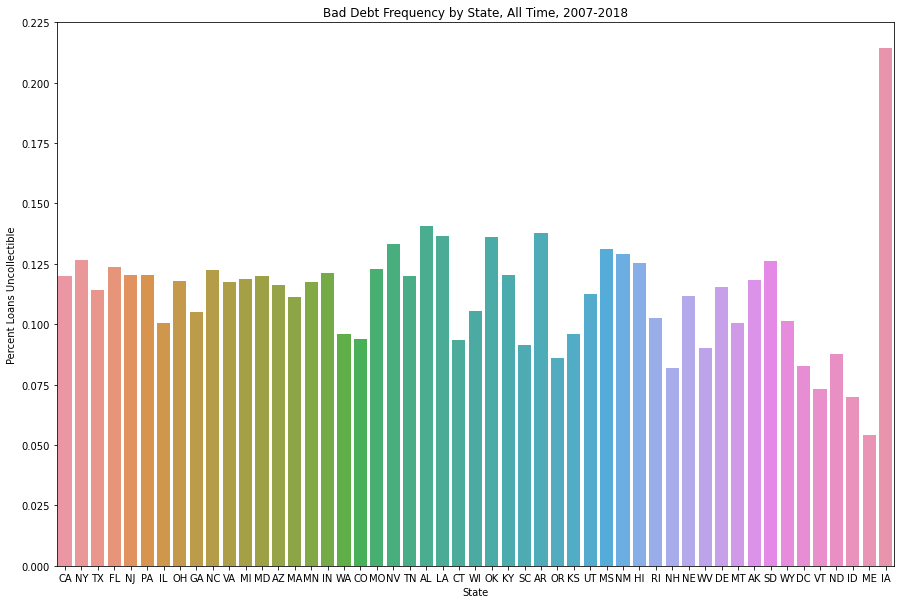

In [0]:
plt.figure(figsize=(15, 10))
sns.barplot(x='State', y='Percent Loans Uncollectible', data=new_to_plot)
plt.title('Bad Debt Frequency by State, All Time, 2007-2018')
plt.show()

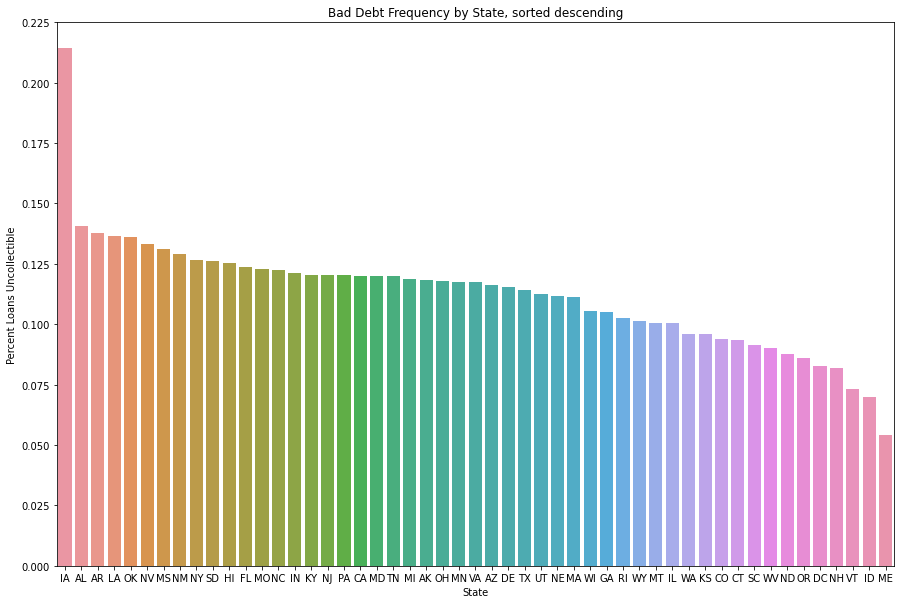

In [0]:
# sorted descending
sorted_frame = new_to_plot.sort_values(by='Percent Loans Uncollectible', ascending=False)
plt.figure(figsize=(15, 10))
sns.barplot(x='State', y='Percent Loans Uncollectible', data=sorted_frame)
plt.title('Bad Debt Frequency by State, sorted descending')
plt.show()